# Motion of a particle in a fixed gravitational field

Central forces:
- directed in OP direction, for every point P
- Magnitude depends only on $r$: 

  $$\boldsymbol{F} = \pm F(r)\hat{u}_r$$





Newton Gravitational Law 
- The motion of planets around the Sun is caused by an attractive force:
- Let's assume the orbit is circular. From the second law:

  

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.animation import FuncAnimation

from IPython.display import HTML

In [2]:
G_cgs = 6.67259 * 10**-8    # G in cgs
M_sun = 1.9891 * 10**33     # solar mass in g
R_sun = 6.9598 * 10**10     # solar radius in cm 
M_earth = 5.976 * 10**27    # earth mass in g
R_earth = 6.378 * 10**8     # earth radius in cm
ly = 9.463 * 10**17         # light year in cm
parsec = 3.086 * 10**18     # parsec in cm
AU = 1.496 * 10**13         # astronomical unit in cm

**INTERNAL UNITS**

We will work with internal units. We use internal units in scientific or numerical codes for speed, stability, accuracy, and consistency. We must avoid working with very big numbers, as $10^{33}$ (solar mass in g), $10^{-11}$ (G in IS). 

$G_{iu}$ is set equal to 1. We are free to express masses and distances in arbitrary units, as far as velocities and times are consistent. In order to see that, notice that $\frac{GM}{rv^2}$ is adimensional. 

$$\frac{M_{iu}}{r_{iu}v_{iu}^2}=\frac{G_{cgs}M_{cgs}}{r_{cgs}v_{cgs}^2}$$

Velocities in internal units will be related to physical velocities by:

$$v_{iu}=\sqrt{\frac{r_{cgs}}{G_{cgs}M_{cgs}}}v_{cgs}$$

We need to tranform time units in internal units as well. $\frac{rt}{v}$ is adimensional. 

$$\frac{t_{iu}v_{iu}}{r_{iu}}=\frac{t_{cgs}v_{cgs}}{r_{cgs}}$$

$$t_{iu}=\frac{r_{iu}}{r_{cgs}}\sqrt{\frac{r_{cgs}}{G_{cgs}M_{cgs}}}t_{cgs}$$

If we chose $1 \, M_\oplus = 1.9891 \times 10^{33}$ g for unit of mass and $1 \, AU = 149.6\times 10^6$ km for distances:

In [5]:
def v_IU(M_cgs, r_cgs, v_cgs):
    return np.sqrt(r_cgs/(G_cgs*M_cgs))*v_cgs

def t_IU(M_cgs, r_cgs, t_cgs):
    return t_cgs/(np.sqrt(r_cgs/(G_cgs*M_cgs))*r_cgs)

print("26.22 km/s expressed in internal units is: %f" % (v_IU(M_sun,AU,26.22*10**5)))
print("1 year expressed in internal units is: %f" % (t_IU(M_sun,AU,3.156*10**7)))

26.22 km/s expressed in internal units is: 0.880284
1 year expressed in internal units is: 6.283696


If we chose $1 \, M_\oplus = 5.9722 \times 10^{27}$ g for unit of mass and $1 \, AU$ for distances:


In [12]:
print("29.82 km/s expressed in internal units is: %f" % (v_IU(M_earth,AU,29.8*10**5)))
print("1 year expressed in internal units is: %f" % (t_IU(M_earth,AU,3.156*10**7)))
print("M sun in internal units is: ",M_sun/M_earth)

29.82 km/s expressed in internal units is: 577.204285
1 year expressed in internal units is: 0.010892
M sun in internal units is:  332848.0589022758


## Circular orbits around the Sun

The force must be centripetal: 

$$m\frac{v^2}{r} = G\frac{mM}{r^2}$$

It follows that, in order for a planet to be in a stable circular orbit at distance $d$ from the Sun, it's velocity must be:

$$v =\sqrt{\frac{GM}{r}} $$

In [13]:
v = np.sqrt(332848.05 / 1)
print(v)

576.929848421799


## Code

In [24]:

def g(r):
    """
    Gravitational field around the Sun
    Gets in input the position (numpy array).
    Returns the force array (numpy array).
    """
    r_magnitude = np.sqrt( r[0]**2 + r[1]**2 + r[2]**2 )
    M_sun_iu = 332848.05
    
    return - M_sun_iu * r / r_magnitude**3


def euler_integrator(r,v,dt):

    r_new = r + v*dt
    v_new = v + g(r)*dt

    return r_new, v_new
    


In [49]:
# Set initial conditions

r_0 = np.array([1,0,0])
v_0 = np.array([0,0.5*577,0])
a_0 = F(r_0)


In [60]:

r_list = [r_0]
v_list = [v_0]
a_list = [a_0]

year = 0.010892
dt = year * 1e-6

# time array
times = np.arange(0, 3 * year, dt)

for t in tqdm(times, desc="Integrating orbit"):
    r_new, v_new = euler_integrator(r_list[-1], v_list[-1], dt)
    r_list.append(r_new)
    v_list.append(v_new)

r_arr = np.array(r_list)
    

Integrating orbit: 100%|██████████| 3000000/3000000 [00:21<00:00, 138265.30it/s]


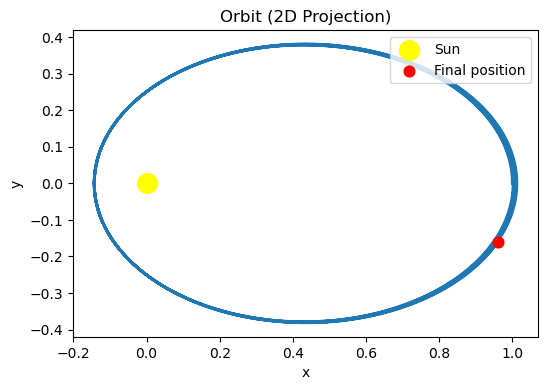

In [61]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(r_arr[:,0], r_arr[:,1], lw=2)
ax.scatter(0, 0, color="yellow", s=200, label="Sun")  # Sun at origin

ax.scatter(r_arr[-1,0], r_arr[-1,1], color="red", s=60, label="Final position",zorder=5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Orbit (2D Projection)")

ax.set_aspect("equal", "box")   # keeps circle from looking elliptical
plt.legend(loc='upper right')
plt.show()

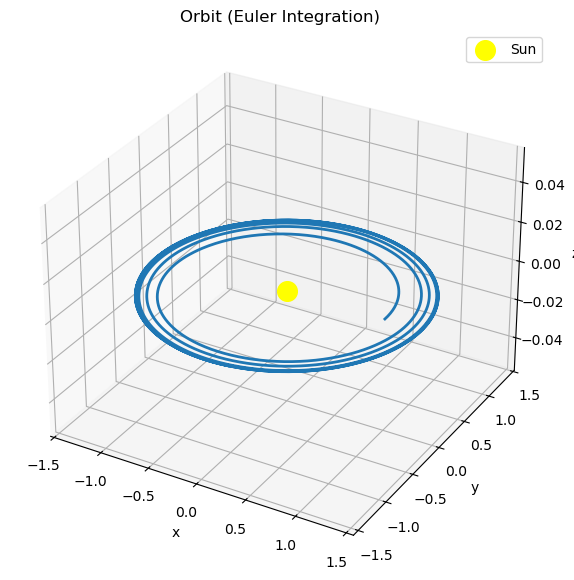

In [37]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")

ax.plot(r_arr[:,0], r_arr[:,1], r_arr[:,2], lw=2)
ax.scatter([0], [0], [0], color="yellow", s=200, label="Sun")  # Sun at origin

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Orbit (Euler Integration)")

plt.legend()
plt.show()

# Multiple planets

In [106]:
class Planet:
    def __init__(self, name, r0, v0, color="black", mass=1.0):
        """
        A simple planet object for N-body or 2-body simulations.

        Parameters
        ----------
        name : str
            Name of the planet.
        r0 : array-like, shape (3,)
            Initial position vector.
        v0 : array-like, shape (3,)
            Initial velocity vector.
        color : str
            Color used in plots.
        mass : float
            Mass in internal units (default=1).
        """
        self.name = name
        self.r = np.array(r0, dtype=float)
        self.v = np.array(v0, dtype=float)
        self.mass = mass
        self.color = color

        self.r_list = [self.r]
        self.v_list = [self.v]
    
    def __repr__(self):
        return f"Planet({self.name}, r={self.r}, v={self.v}, mass={self.mass})"


In [123]:
planets = []

planets_a = {
    "Mercury": 0.387,
    "Venus": 0.723,
    "Earth": 1.000,
    "Mars": 1.524,
    "Jupiter": 5.203,
    "Saturn": 9.537,
    #"Uranus": 19.191,
    #"Neptune": 30.068
}

def v_circular(a):
    return np.sqrt(332848.05 / a)


planets_v_circ = {}
for p in planets_a.keys():
    planets_v_circ[p] = v_circular(planets_a[p])


In [124]:
planets_v_circ

{'Mercury': 927.4009276575881,
 'Venus': 678.5062614950335,
 'Earth': 576.929848421799,
 'Mars': 467.33738592526976,
 'Jupiter': 252.92752572479674,
 'Saturn': 186.81731121536598}

In [125]:
planets_colors = {
    "Mercury": 'brown',
    "Venus": 'pink',
    "Earth": 'blue',
    "Mars": 'red',
    "Jupiter": 'darkred',
    "Saturn": 'orange',
    "Uranus": 'cyan',
    "Neptune": 'navy'
}

planets = []
for p in planets_a.keys():
    r_0 = np.array([planets_a[p],0,0])
    v_0 = np.array([0,planets_v_circ[p],0])
    planets.append(Planet(name=p,r0=r_0,v0=v_0,color=planets_colors[p]))




In [126]:
year = 0.010892
dt = year * 1e-4

# time array
times = np.arange(0, 8 * year, dt)

for t in tqdm(times, desc="Integrating orbit"):

    for p in planets:

        r_old = p.r_list[-1] 
        v_old = p.v_list[-1] 
    
        r_new, v_new = euler_integrator(r_old, v_old, dt)
        p.r_list.append(r_new)
        p.v_list.append(v_new)

    


Integrating orbit: 100%|███████████████| 80000/80000 [00:03<00:00, 21410.23it/s]


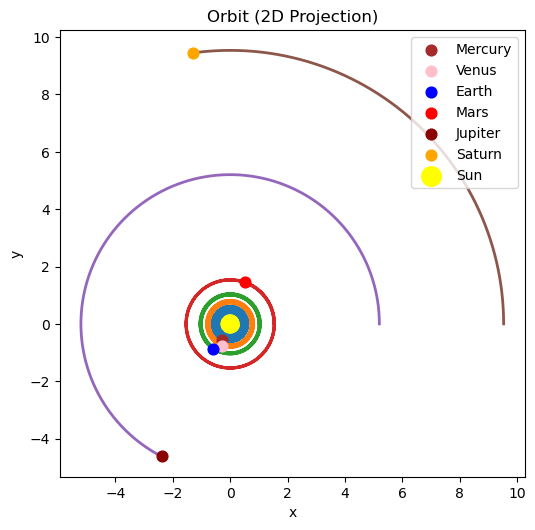

In [127]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

for p in planets:
    r_arr = np.array(p.r_list)
    ax.plot(r_arr[:,0], r_arr[:,1], lw=2)
    ax.scatter(r_arr[-1,0], r_arr[-1,1], color=p.color, s=60, label=p.name,zorder=5)

ax.scatter(0, 0, color="yellow", s=200, label="Sun")  # Sun at origin

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Orbit (2D Projection)")

ax.set_aspect("equal", "box")   # keeps circle from looking elliptical
plt.legend(loc='upper right')
plt.show()

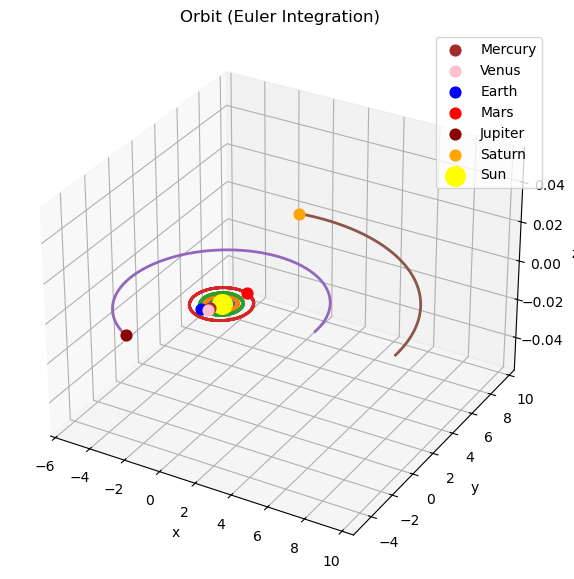

In [128]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")

for p in planets:
    r_arr = np.array(p.r_list)
    ax.plot(r_arr[:,0], r_arr[:,1], r_arr[:,2], lw=2)
    ax.scatter(r_arr[-1,0], r_arr[-1,1], r_arr[-1,2], color=p.color, s=60, label=p.name,zorder=5)

ax.scatter([0], [0], [0], color="yellow", s=200, label="Sun")  # Sun at origin

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Orbit (Euler Integration)")

plt.legend()
plt.show()


mating:  96%|██████████████████████████████▊ | 26/27 [00:06<00:00,  2.97it/s]

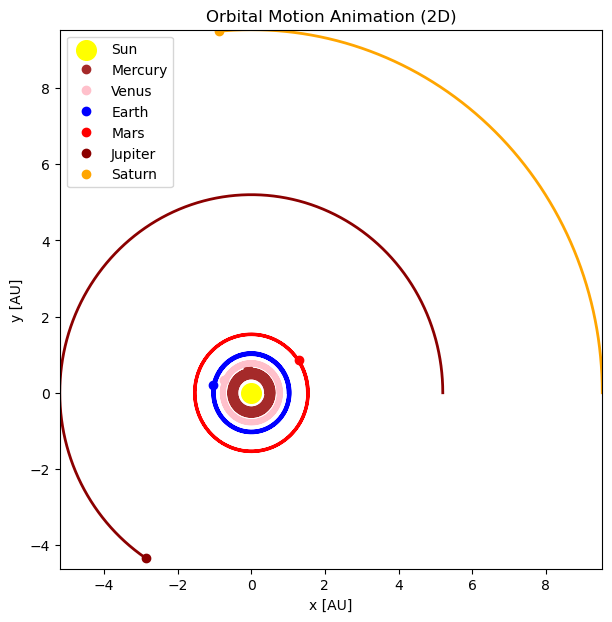

In [129]:
r_arrays = {p.name: np.array(p.r_list) for p in planets}

all_positions = np.vstack([r_arrays[p.name] for p in planets])
xmin, xmax = np.min(all_positions[:,0]), np.max(all_positions[:,0])
ymin, ymax = np.min(all_positions[:,1]), np.max(all_positions[:,1])

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(0, 0, color="yellow", s=200, label="Sun")

lines = {}
points = {}
for p in planets:
    lines[p.name], = ax.plot([], [], lw=2, color=p.color)
    points[p.name], = ax.plot([], [], 'o', color=p.color, label=p.name)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel("x [AU]")
ax.set_ylabel("y [AU]")
ax.set_title("Orbital Motion Animation (2D)")
ax.legend()

def init():
    for p in planets:
        lines[p.name].set_data([], [])
        points[p.name].set_data([], [])
    return list(lines.values()) + list(points.values())

# -----------------------------
# Sample frames to reduce size
# -----------------------------
total_frames = len(next(iter(r_arrays.values())))
step = 3000
frames_to_use = range(0, total_frames, step)

# Wrap frames with tqdm for progress
frames_iter = tqdm(frames_to_use, desc="Animating")

def update(frame):
    for p in planets:
        r = r_arrays[p.name]
        lines[p.name].set_data(r[:frame,0], r[:frame,1])
        points[p.name].set_data([r[frame,0]], [r[frame,1]])
    return list(lines.values()) + list(points.values())

ani = FuncAnimation(
    fig,
    update,
    frames=frames_iter,  # Use tqdm iterator
    init_func=init,
    interval=50,
    blit=True
)

HTML(ani.to_jshtml())
